# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [6]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

### single-link

### 群聚與群聚間的距離可以定義為不同群聚中最接近兩點間的距離

In [7]:
hc_ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc_ward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

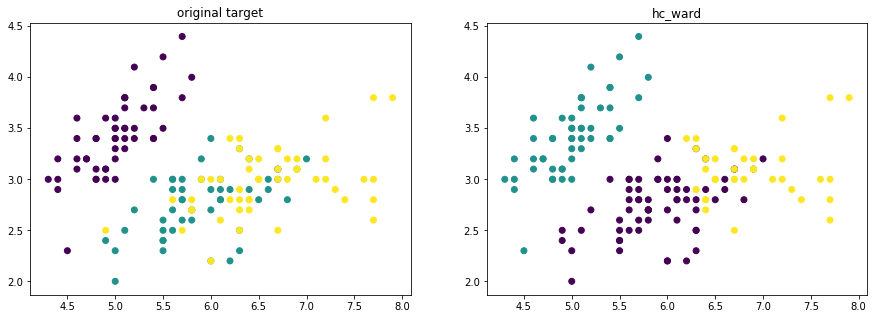

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,1], c=iris.target)

plt.subplot(122)
plt.title('hc_ward')
plt.scatter(X[:,0], X[:,1], c=hc_ward.labels_)

### complete-link 

### 群聚間的距離定義為不同群聚中最遠兩點間的距離，這樣可以保證這兩個集合合併後, 任何一對的距離不會大於 d

In [10]:
hc_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
hc_complete.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

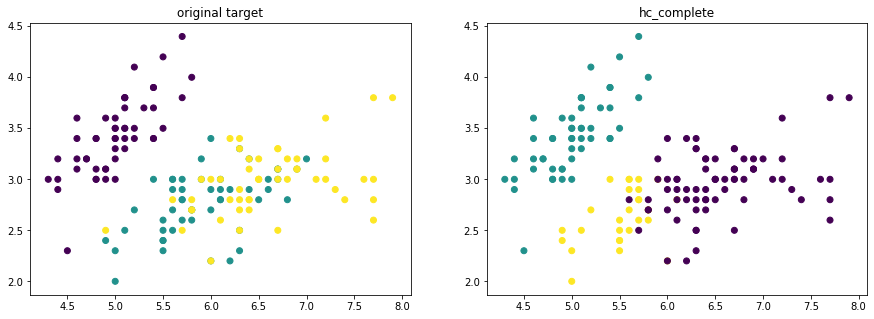

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,1], c=iris.target)

plt.subplot(122)
plt.title('hc_complete')
plt.scatter(X[:,0], X[:,1], c=hc_complete.labels_)

### average-link 

### 群聚間的距離定義為不同群聚間各點與各點間距離總和的平均

In [12]:
hc_average = AgglomerativeClustering(n_clusters=3, linkage="average")
hc_average.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

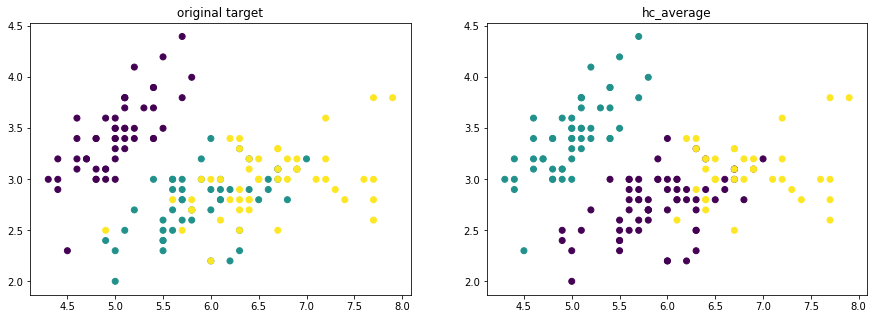

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,1], c=iris.target)

plt.subplot(122)
plt.title('hc_average')
plt.scatter(X[:,0], X[:,1], c=hc_average.labels_)

以上選兩種特徵圖形化鳶尾花資料集，比較三種不同的階層分群方式的成果

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

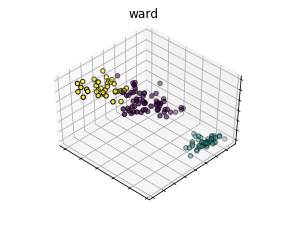

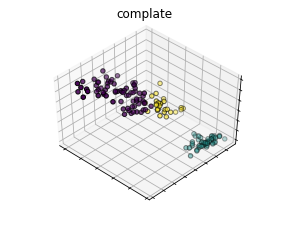

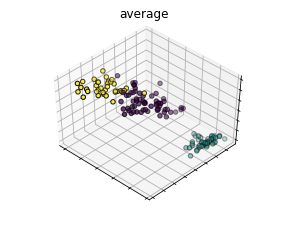

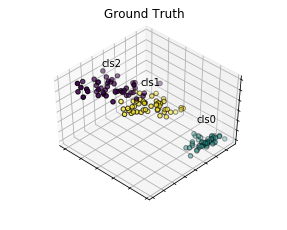

In [16]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

以3D效果呈現階層式資料分群